In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## import data
from scipy.io import loadmat

# data 1
Scurve = loadmat('ScurveData.mat')['data3']  

In [3]:
Scurve.shape

(352, 3)

<IPython.core.display.Javascript object>


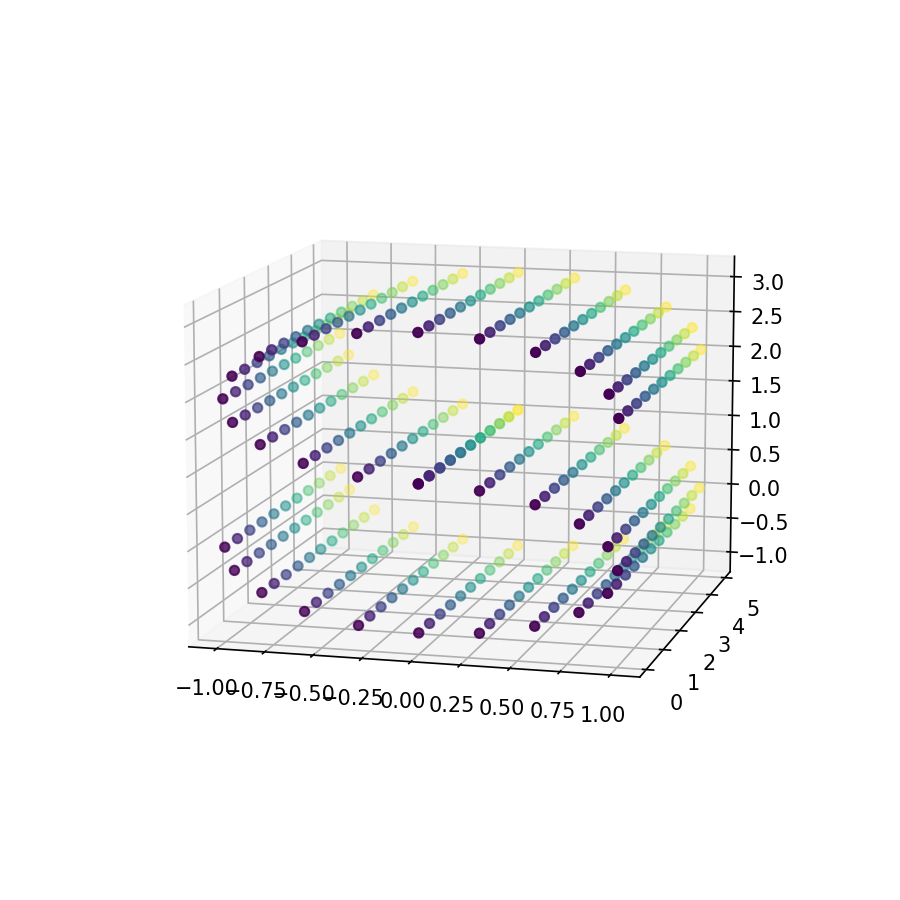

In [4]:
%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(Scurve[:,0],Scurve[:,1],Scurve[:,2],c=Scurve[:,1],cmap='viridis')

In [5]:
# data 2
def dScurve(sig,X=Scurve):
    n,D = Scurve.shape
    
    np.random.seed(211)
    
    pert = sig*np.random.normal(size=(n,D))
    return X + pert

In [6]:
# data 3
emoji = loadmat('FaceData.mat')
face, colors = emoji['data3'], emoji['colors']

In [7]:
print(colors.shape)
print(face.shape)

(1024, 3)
(1024, 1600)


I used built-in function for isomap LLE and t-SNE in sklearn.manifold python library and PCA from sklearn.decomposition.

In [8]:
## import methods
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from sklearn.decomposition import PCA

In [9]:
## diffusion map
from sklearn.metrics.pairwise import euclidean_distances
def myDiffusionMap(X,d,t,eps=None):
    n, D = X.shape
    
    # step 1
    sdmat = euclidean_distances(X,X)**2
    
    # step 2
    if eps is None:
        drowmin = np.zeros(n)
        for i in range(n):
            drowmin[i] = min(sdmat[i,np.setdiff1d(range(n),i)])
        eps = 2*np.mean(drowmin)
    kmat = np.exp(-sdmat/eps)
    
    # step 3
    q = np.sum(kmat,axis=1)
    Q = np.diag(q)
    Qinv = np.diag(1/q)
    P = Qinv @ kmat
#     pi = q/sum(q)
    
#     # step 4
#     Pt = P**t
#     sqDiffDMat = np.zeros((n,n))
#     for i in range(n):
#         sqDiffDMat[i,:] = np.sum((Pt-Pt[i,:])**2/pi,axis=1)
    
    # step 5
    sig,V = np.linalg.eigh( np.diag(q**0.5)@P@np.diag(q**(-0.5)) )
    ind = np.argsort(sig)[::-1][1:d+1]
    R = np.diag(1/np.sqrt(q))@V
    return R[:,ind]@np.diag(sig[ind]**t)

def dmap(X,d,t,eps=None,color=False):
    X_transformed = myDiffusionMap(X,d,t,eps)
    plt.close()
    if color:
        c = colors
    else:
        c = X_transformed[:,0]
    if d==2:
        plt.scatter(x=X_transformed[:,0],y=X_transformed[:,1],c=c,cmap='viridis')
    elif d==3:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
        ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],c=c,cmap='viridis')
    plt.show()

<IPython.core.display.Javascript object>


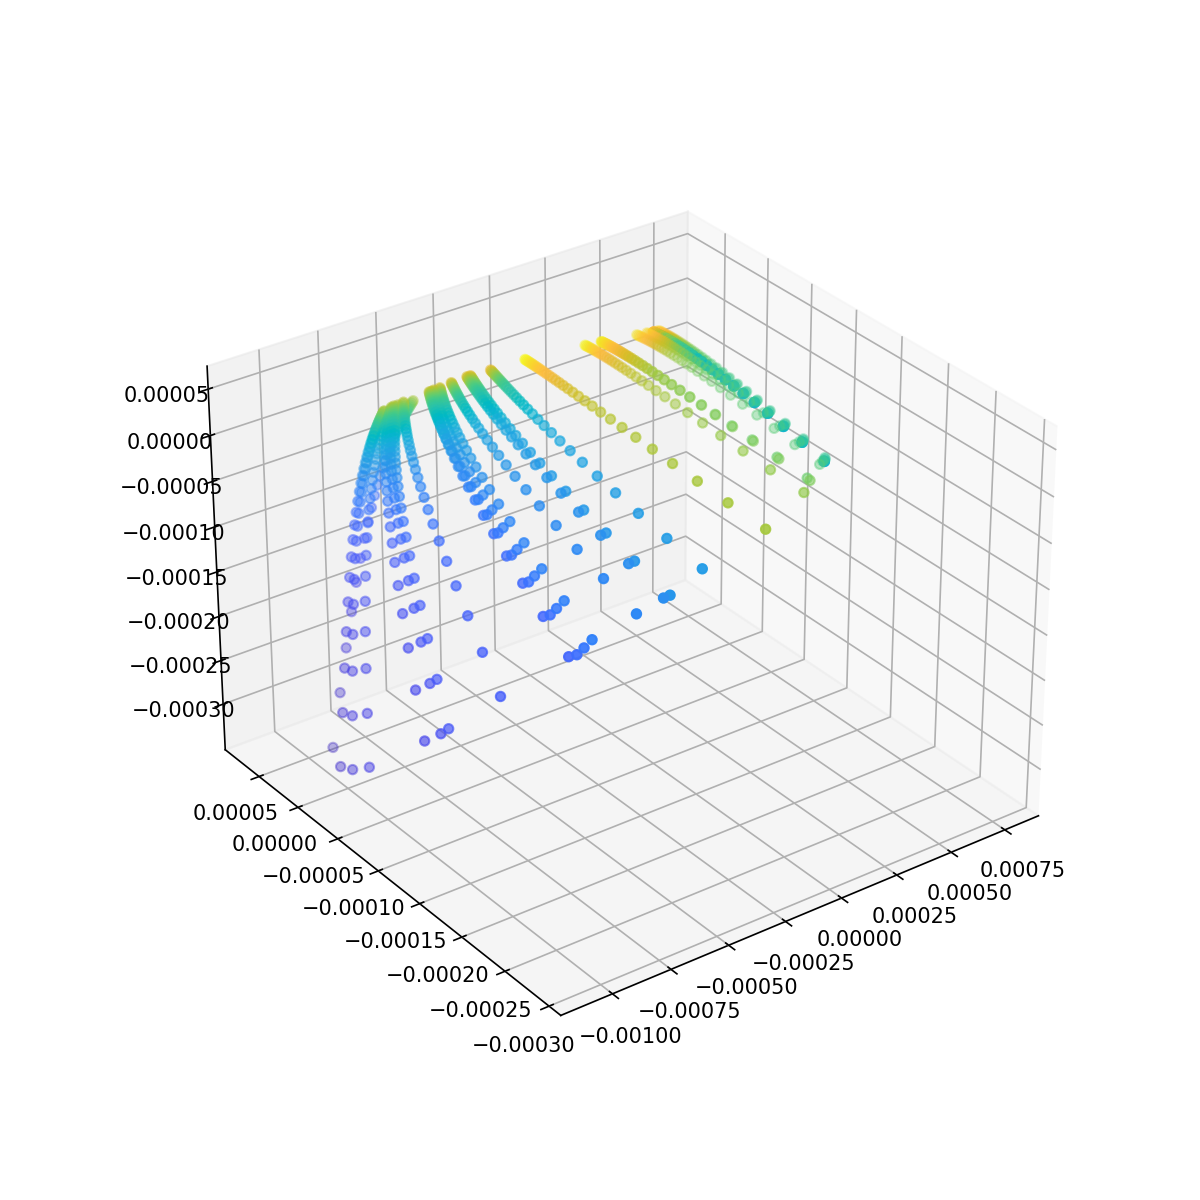

In [10]:
dmap(face,3,5,eps=10,color=True)

In [11]:
## PCA
def PCA_p(X,d,color=False):
    m = PCA(n_components=d)
    X_transformed = m.fit_transform(X)
    plt.close()
    if color:
        c = colors
    else:
        c = X_transformed[:,0]
    if d==2:
        plt.scatter(x=X_transformed[:,0],y=X_transformed[:,1],c=c,cmap='viridis')
    elif d==3:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
        ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],c=c,cmap='viridis')
    plt.show()

<IPython.core.display.Javascript object>


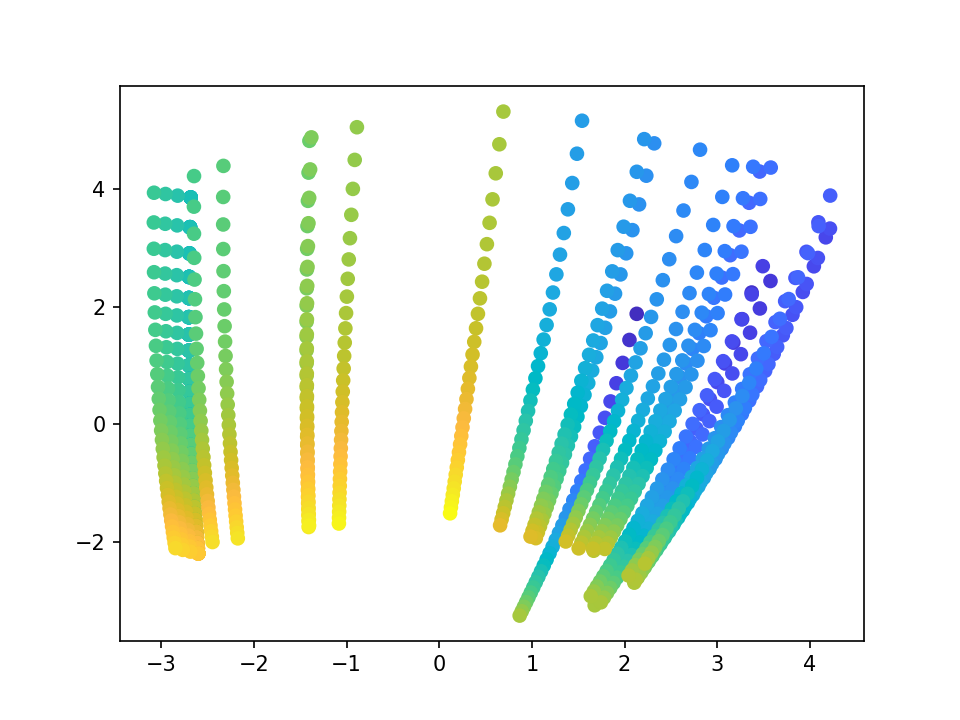

In [12]:
PCA_p(face,2,color=True)

In [13]:
## Isomap
def isomap(X,k,d,color=False):
    im = Isomap(n_neighbors=k, n_components=d)
    X_transformed = im.fit_transform(X)
    if color:
        c = colors
    else:
        c = X_transformed[:,0]
    plt.close()
    if d==2:
        plt.scatter(x=X_transformed[:,0],y=X_transformed[:,1],c=c,cmap='viridis')
    elif d==3:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
        ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],c=c,cmap='viridis')
    plt.show()

<IPython.core.display.Javascript object>


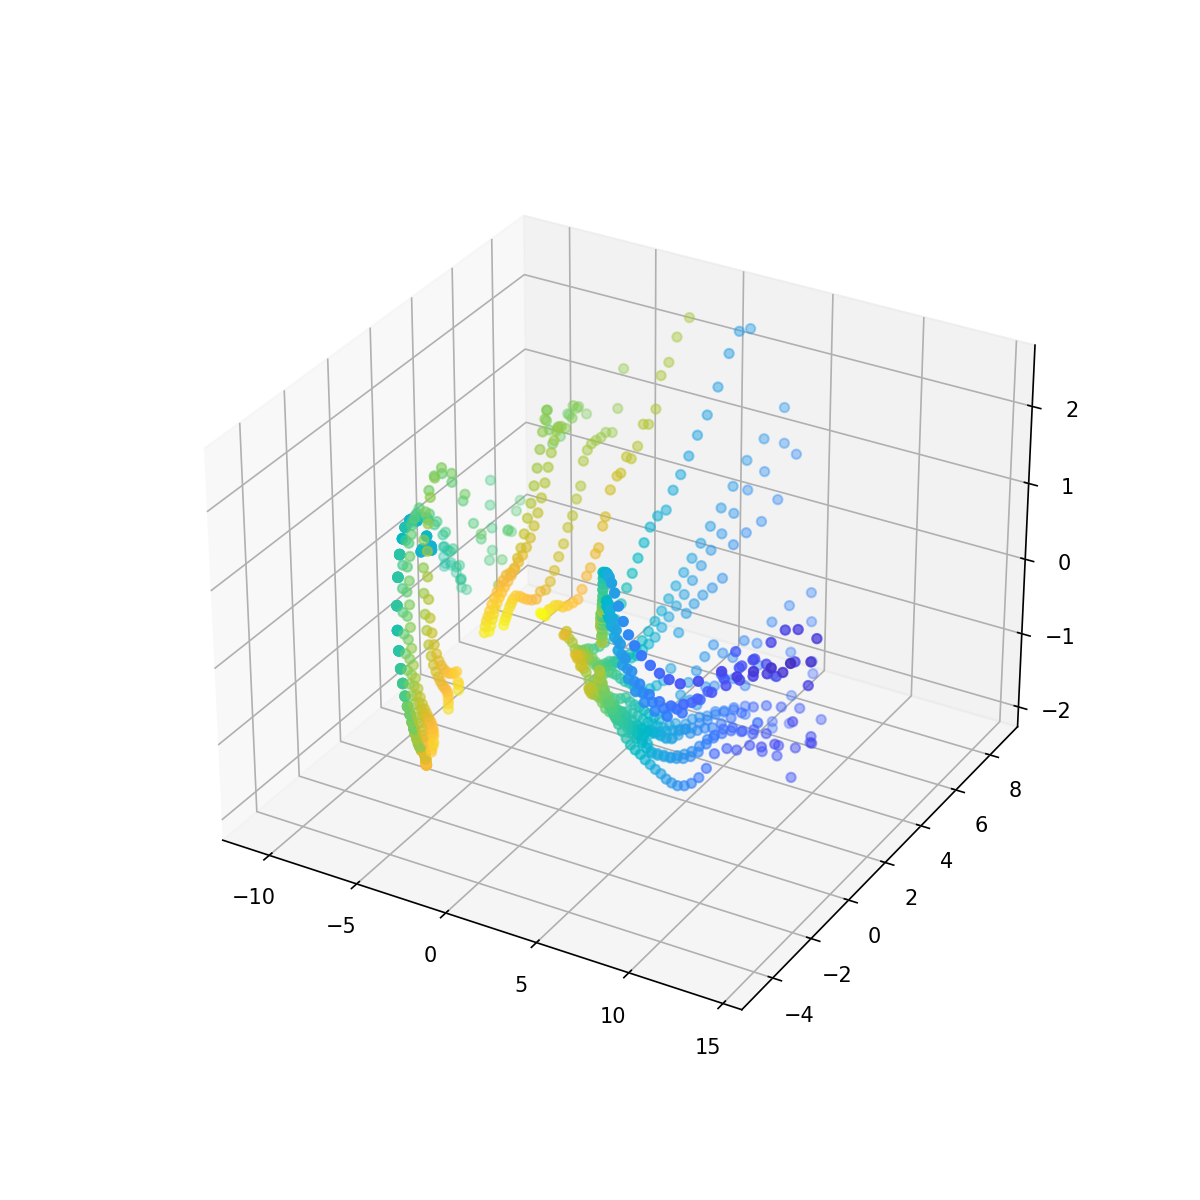

In [14]:
isomap(face,30,3,color=True)

In [15]:
## LLE
def LLE(X,k,d,color=False):
    LLEm = LocallyLinearEmbedding(n_neighbors=k, n_components=d)
    X_transformed = LLEm.fit_transform(X)
    if color:
        c = colors
    else:
        c = X_transformed[:,0]
    plt.close()
    if d==2:
        plt.scatter(x=X_transformed[:,0],y=X_transformed[:,1],c=c,cmap='viridis')
    elif d==3:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
        ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],c=c,cmap='viridis')
    plt.show()

<IPython.core.display.Javascript object>


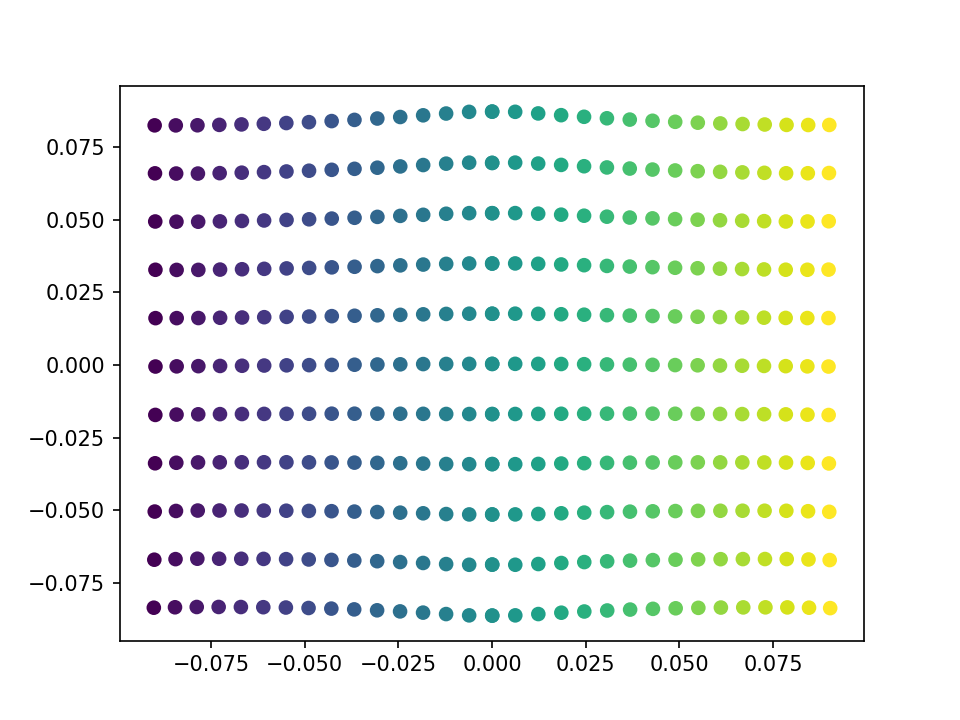

In [16]:
LLE(Scurve,k=5,d=2)

<IPython.core.display.Javascript object>


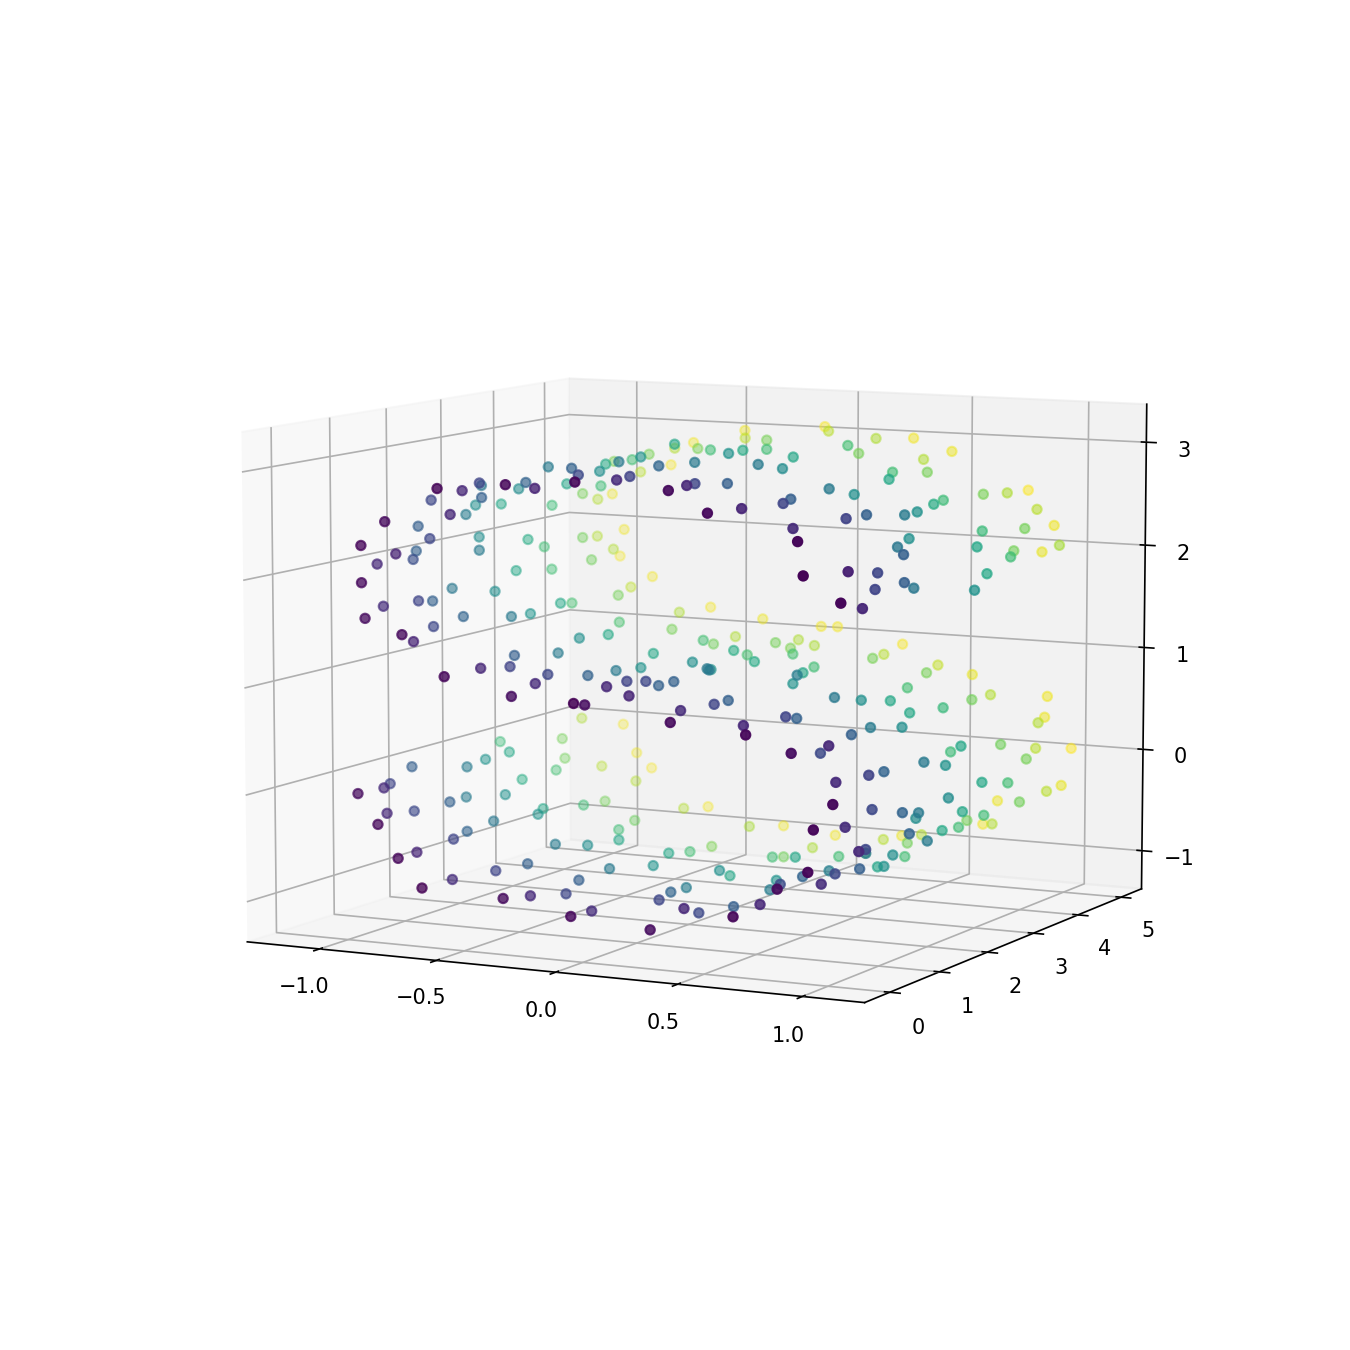

In [18]:
X_p = dScurve(0.05)
plt.close()
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X_p[:,0],X_p[:,1],X_p[:,2],c=X_p[:,1],cmap='viridis')

<IPython.core.display.Javascript object>


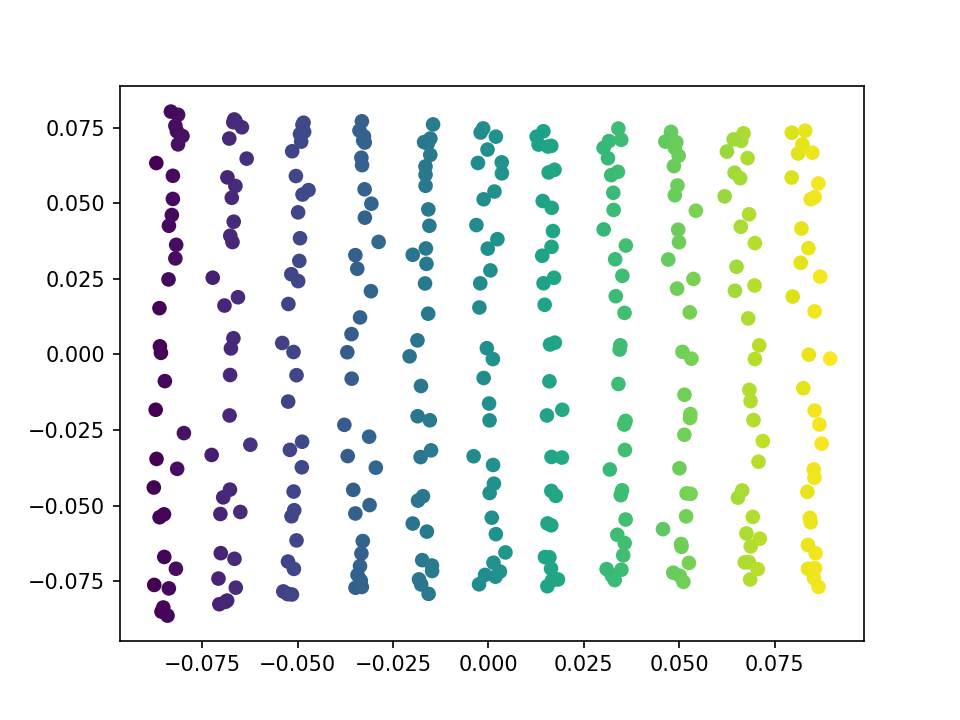

In [19]:
LLE(dScurve(0.05),k=15,d=2)

<IPython.core.display.Javascript object>


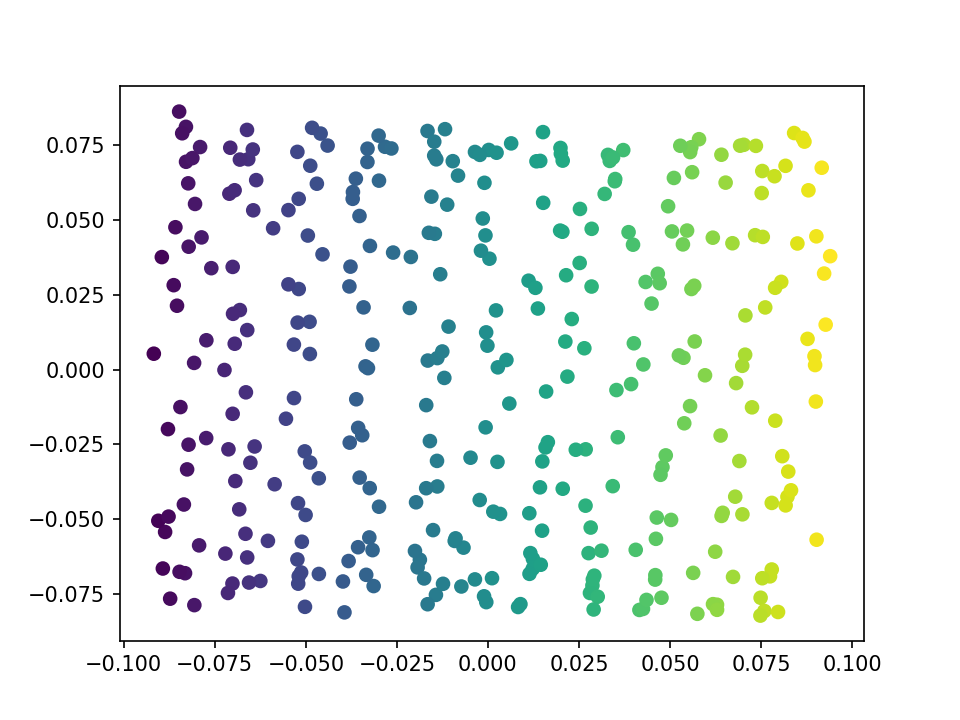

In [20]:
LLE(dScurve(0.1),k=15,d=2)

<IPython.core.display.Javascript object>


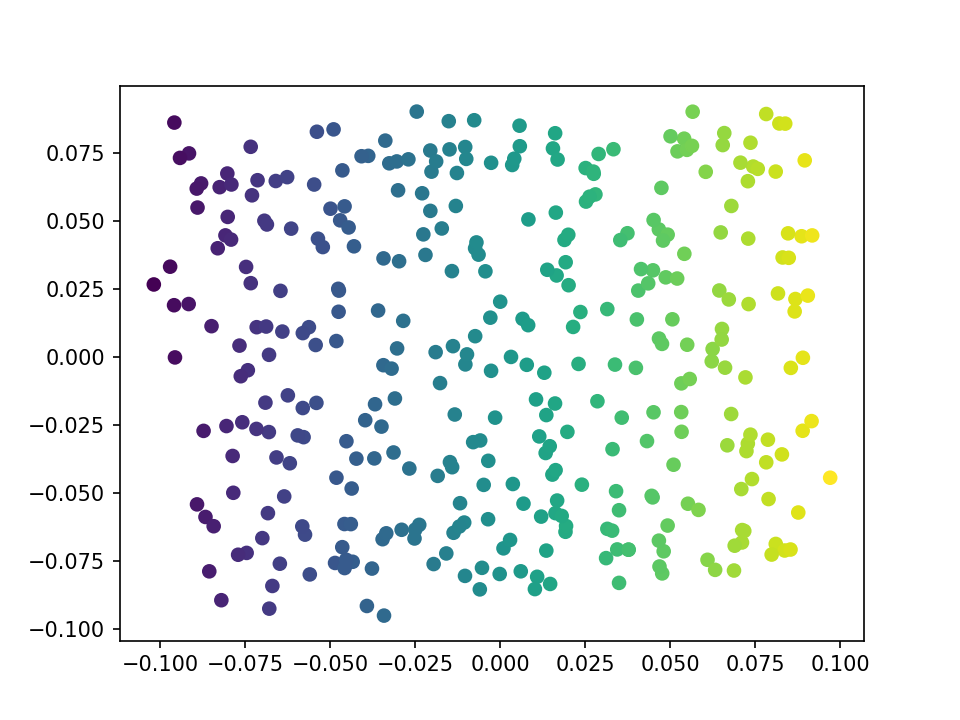

In [21]:
LLE(dScurve(0.2),k=17,d=2)

<IPython.core.display.Javascript object>


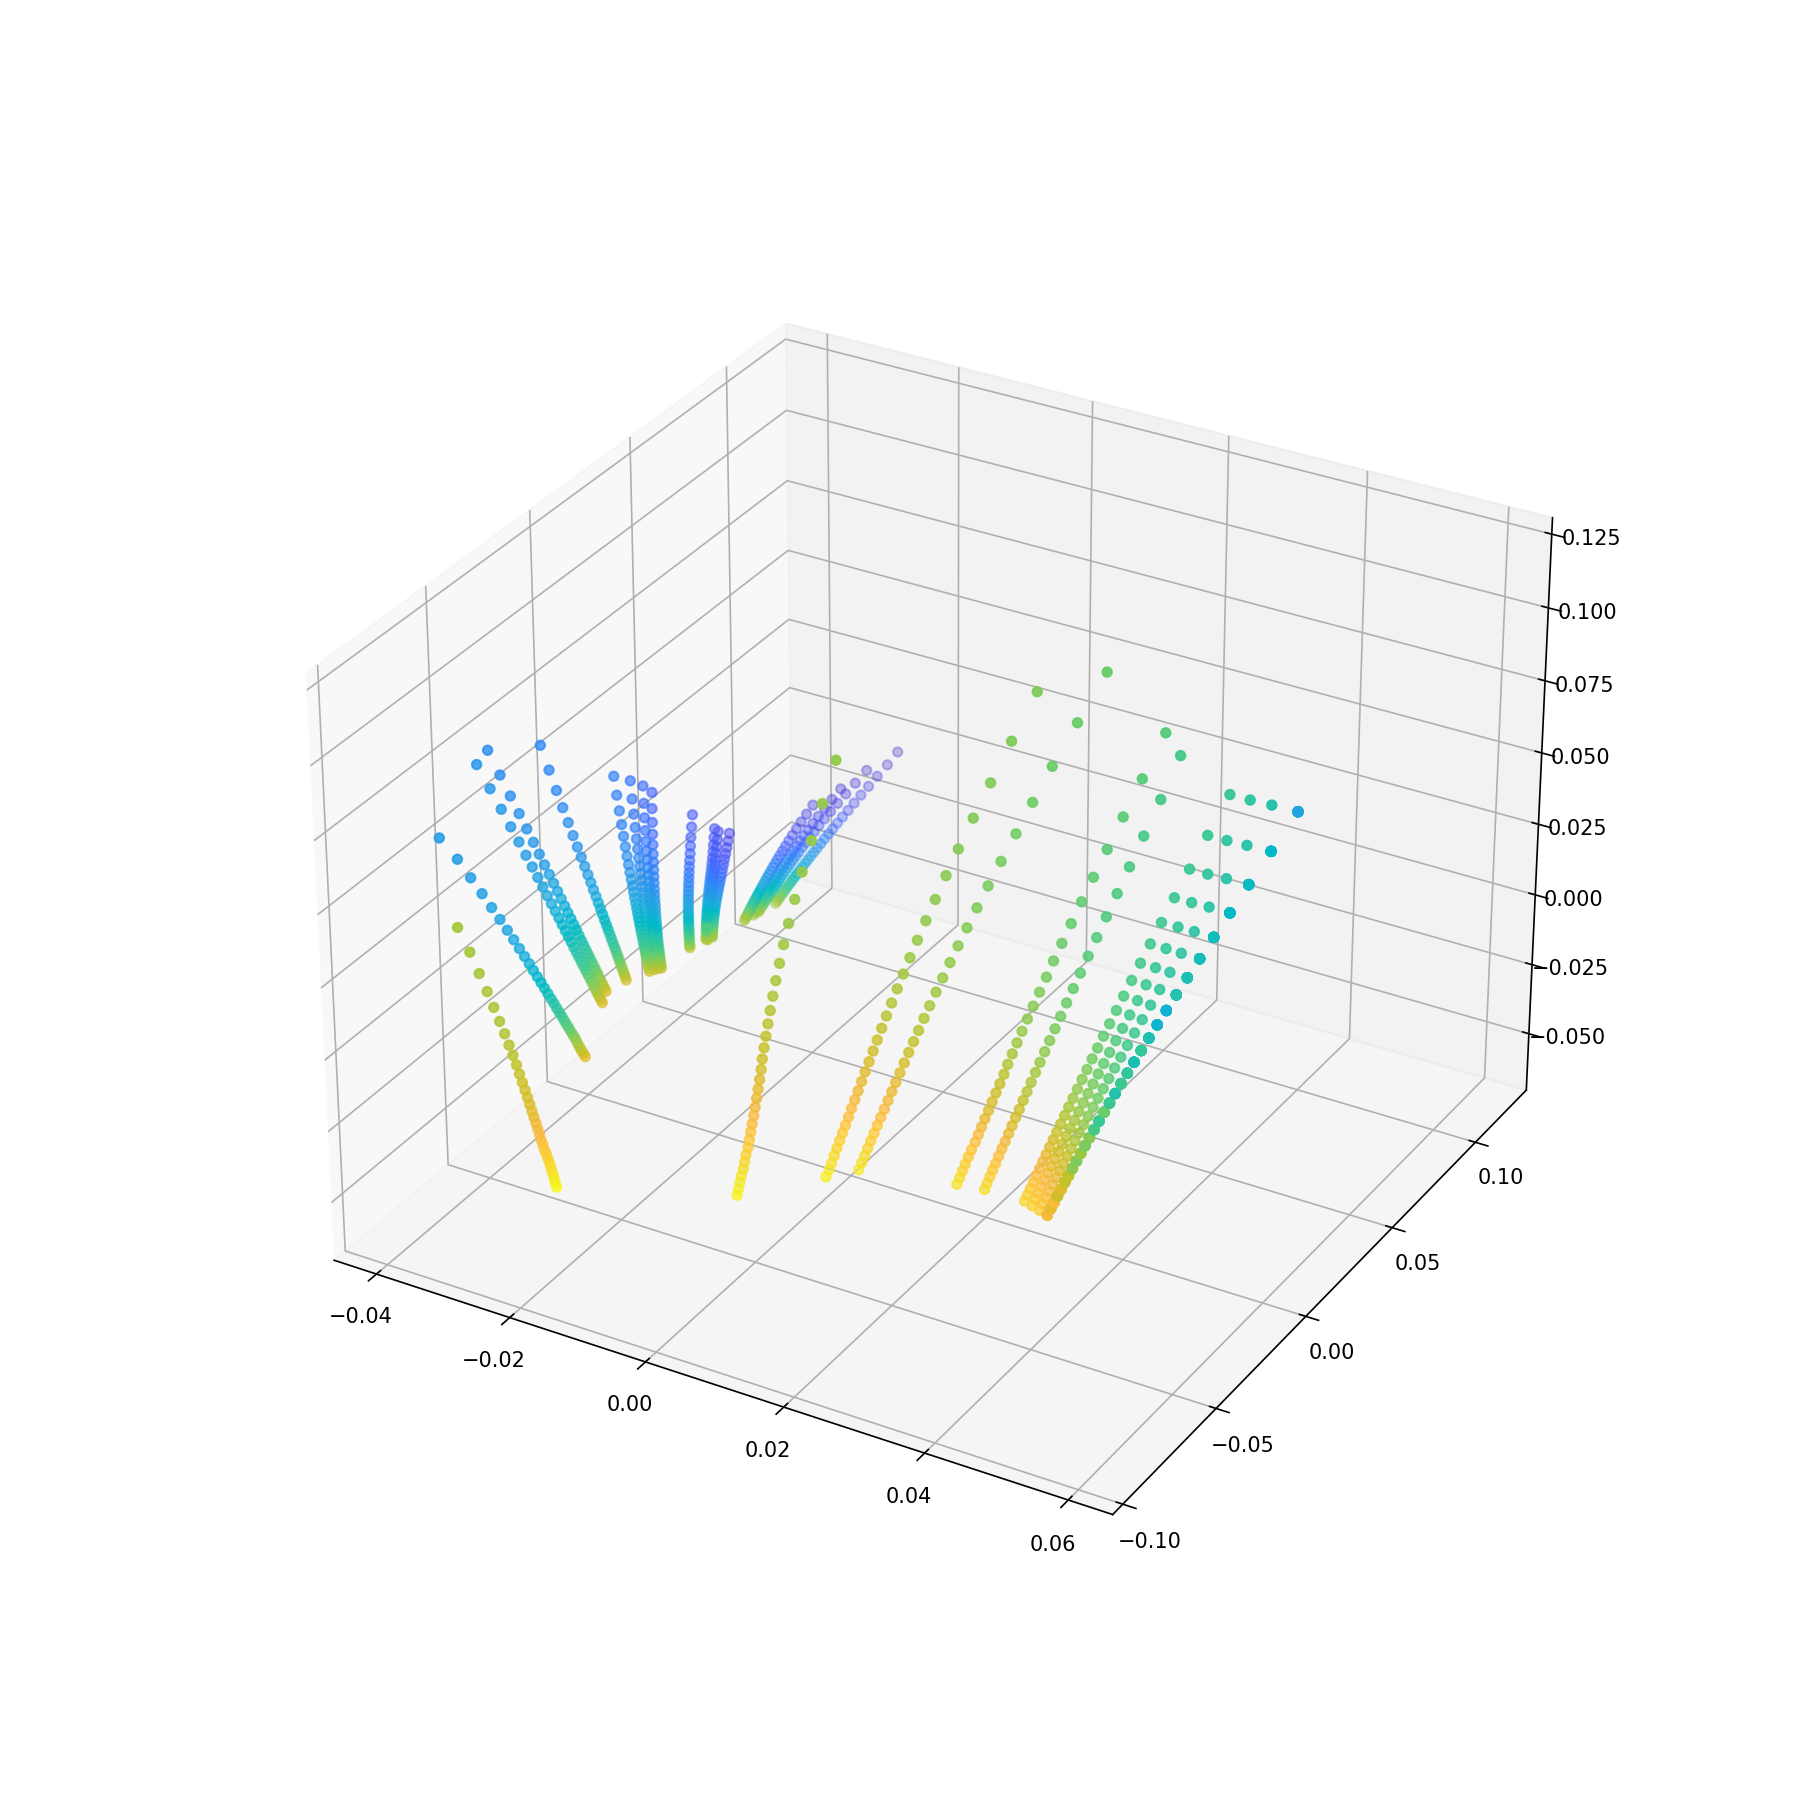

In [22]:
# face.shape
LLE(face,k=50,d=3,color=True)

<IPython.core.display.Javascript object>


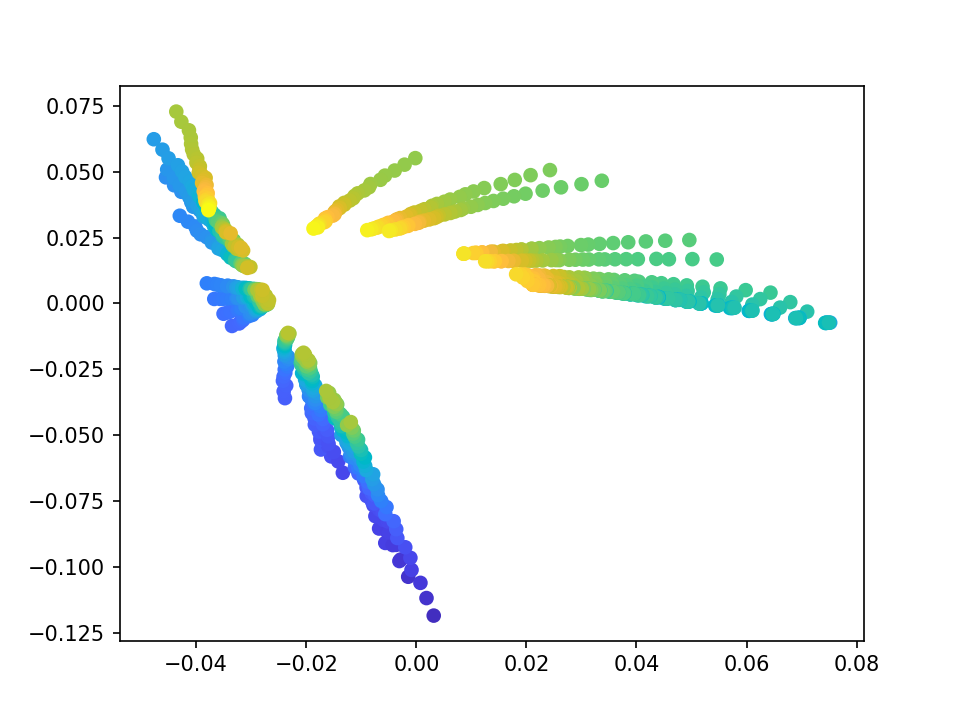

In [23]:
LLE(face,k=65,d=2,color=True)

In [24]:
## t-SNE
def tSNE(X,d,p=30,lr=200,color=False):
    tsnem = TSNE(n_components=d, perplexity=p, learning_rate=lr, init='pca')
    X_transformed = tsnem.fit_transform(X)
    if color:
        c = colors
    else:
        c = X_transformed[:,0]
    plt.close()
    if d==2:
        plt.scatter(x=X_transformed[:,0],y=X_transformed[:,1],c=c,cmap='viridis')
    elif d==3:
        fig = plt.figure(figsize=(6,6))
        ax = plt.axes(projection='3d')
        ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],c=c,cmap='viridis')
    plt.show()

<IPython.core.display.Javascript object>


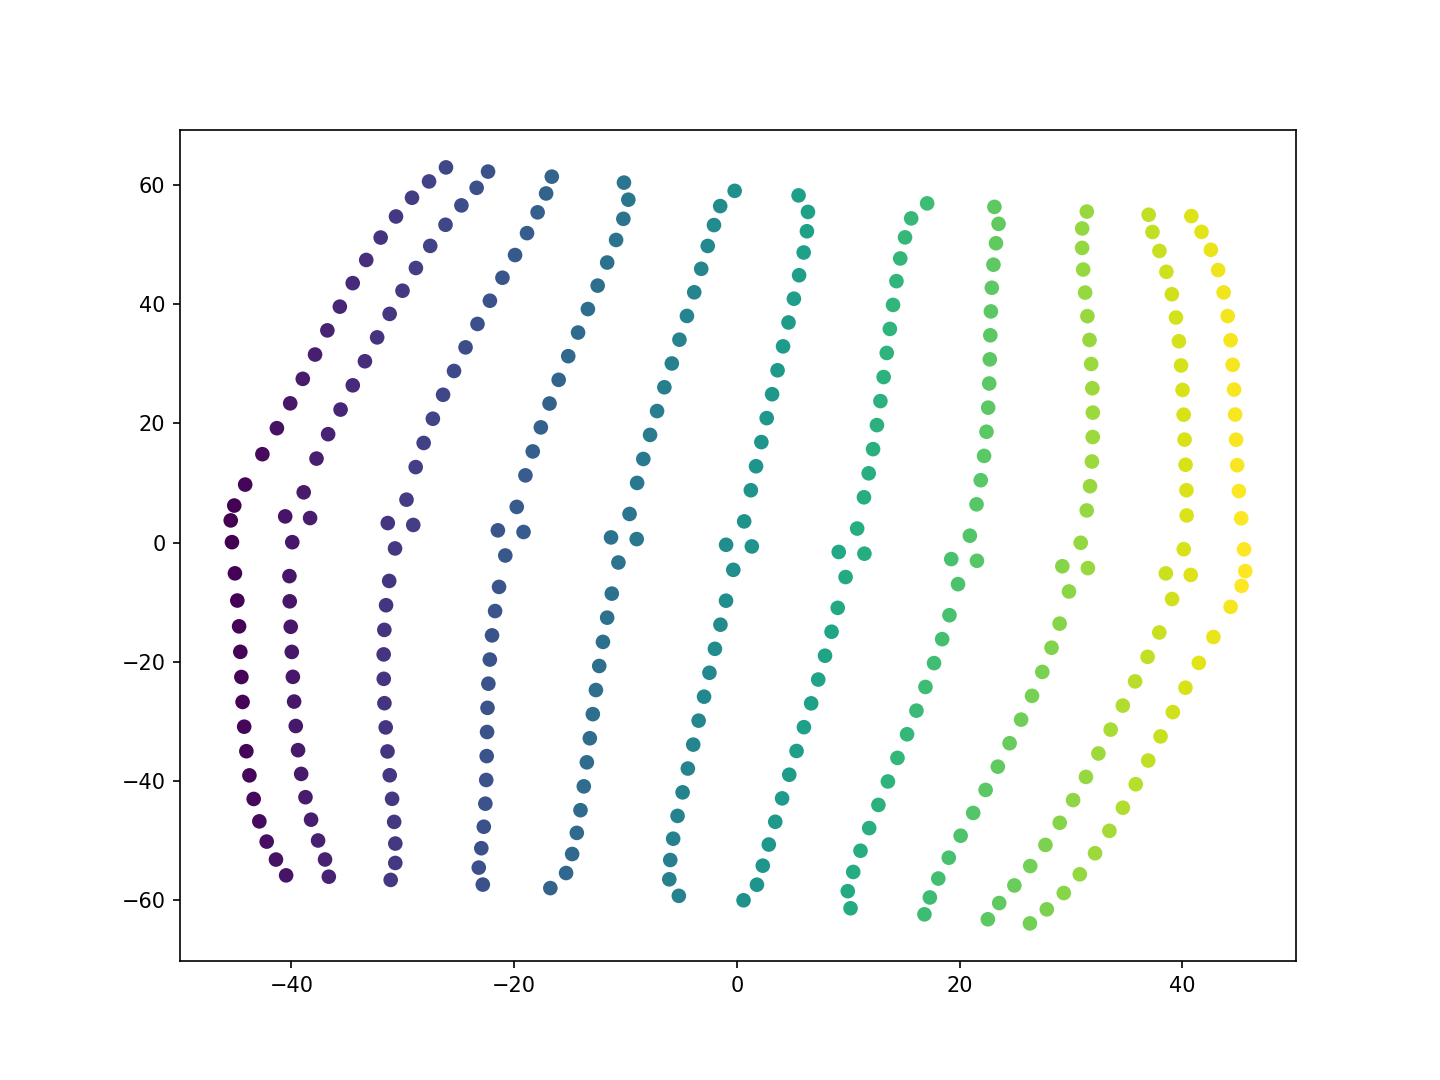

In [27]:
tSNE(Scurve,2,p=10)

<IPython.core.display.Javascript object>


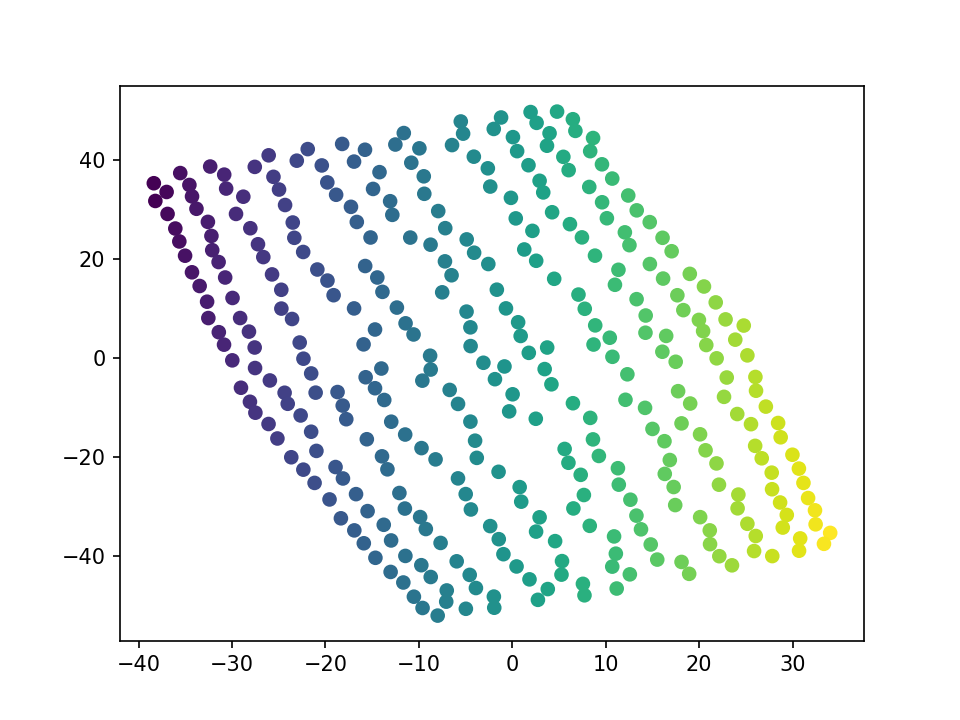

In [26]:
tSNE(dScurve(0.05),2,p=20)

<IPython.core.display.Javascript object>


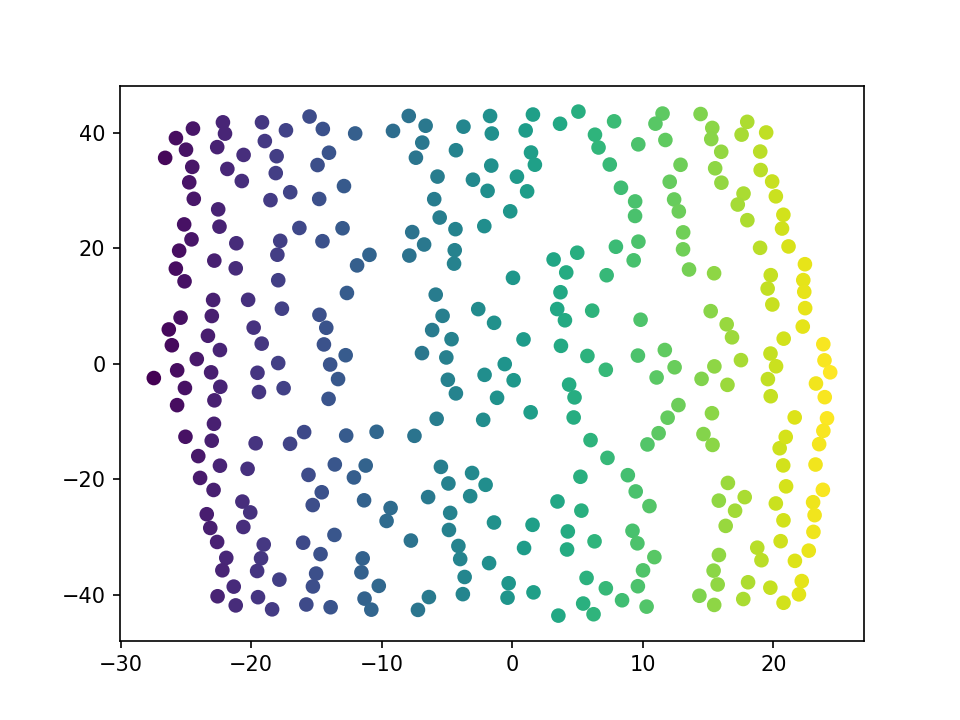

In [28]:
tSNE(dScurve(0.1),2,p=20)

<IPython.core.display.Javascript object>


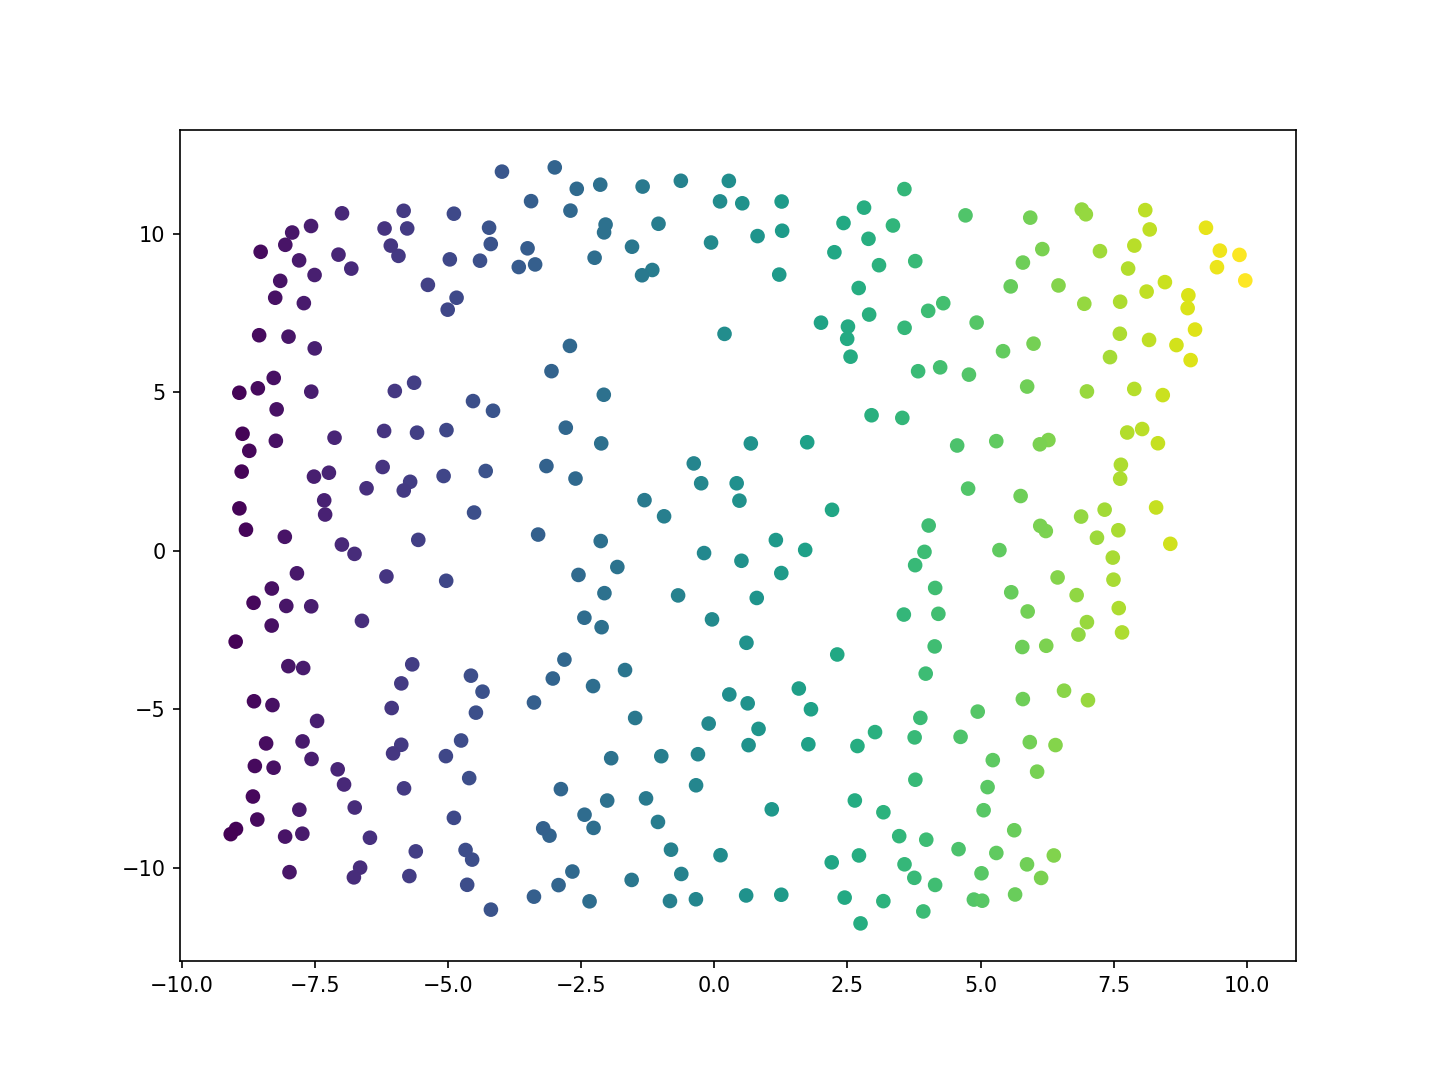

In [130]:
tSNE(dScurve(0.2),2,p=50)

<IPython.core.display.Javascript object>


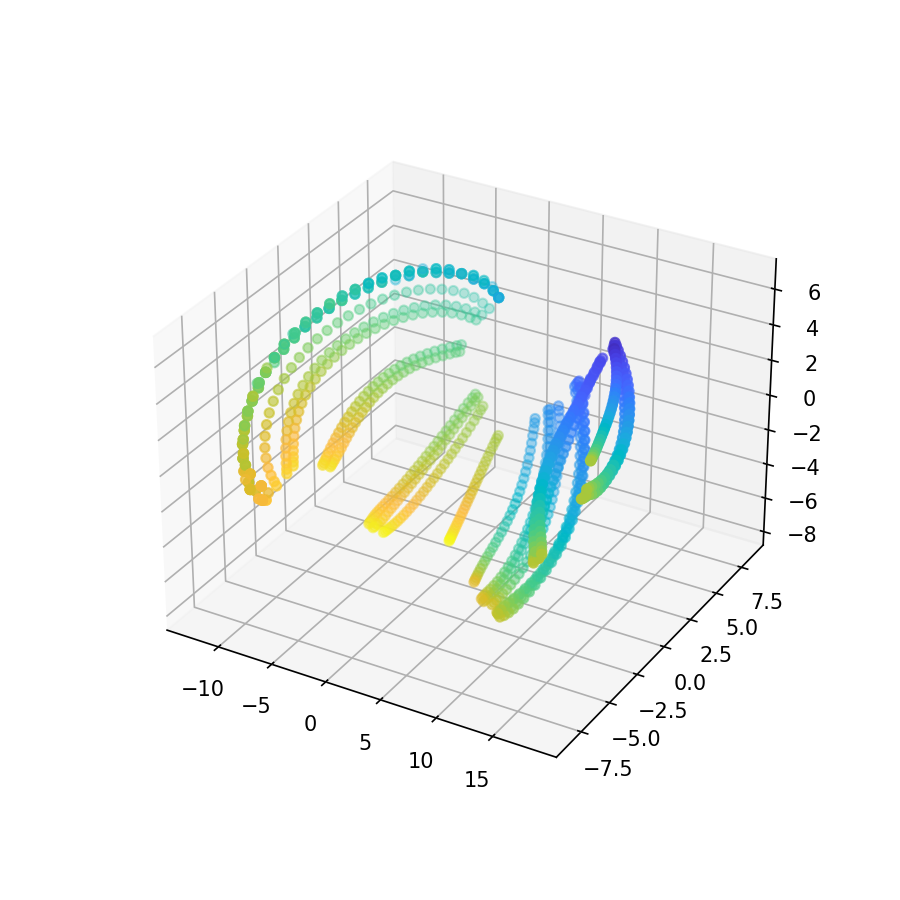

In [29]:
tSNE(face,3,p=50,color=True)

<IPython.core.display.Javascript object>


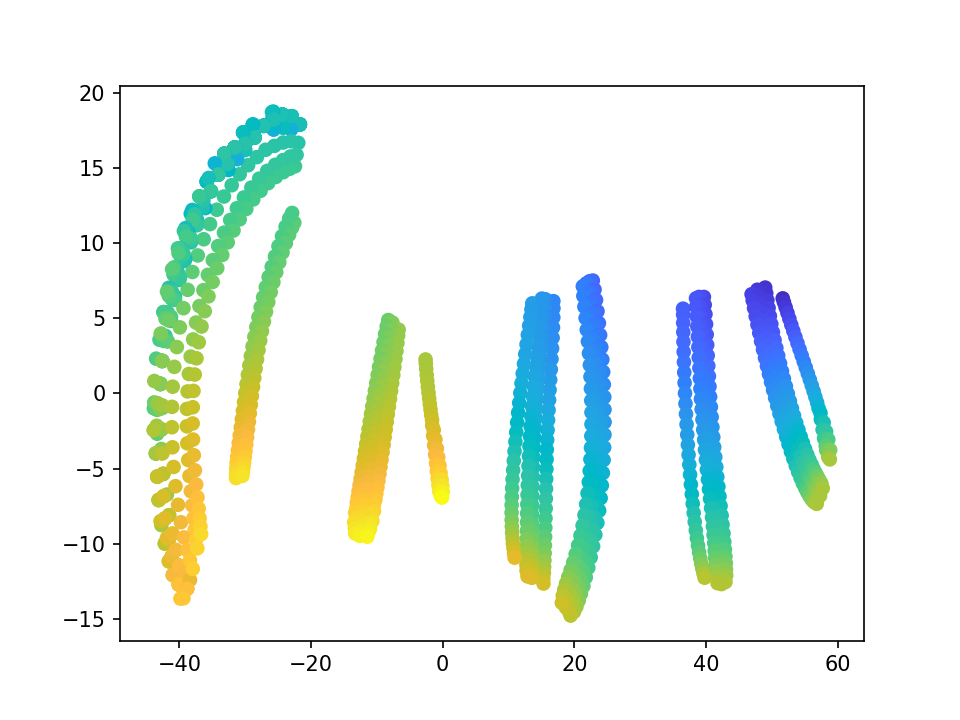

In [30]:
tSNE(face,2,p=50,color=True)

In [31]:
plt.close()

Thanks.